# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [344]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [345]:
import warnings
warnings.filterwarnings('ignore')

In [346]:
df = pd.read_csv('train.csv', na_values='NAN')

In [347]:
df.shape

(1460, 81)

In [348]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [349]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [350]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [351]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [352]:
# Installing sweetviz for auto EDA
! pip install sweetviz

In [353]:
import sweetviz as sv
sweet_report = sv.analyze(source=df, pairwise_analysis='off')
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [354]:
# Summary of dataset: 1460 rowsm 82 cols

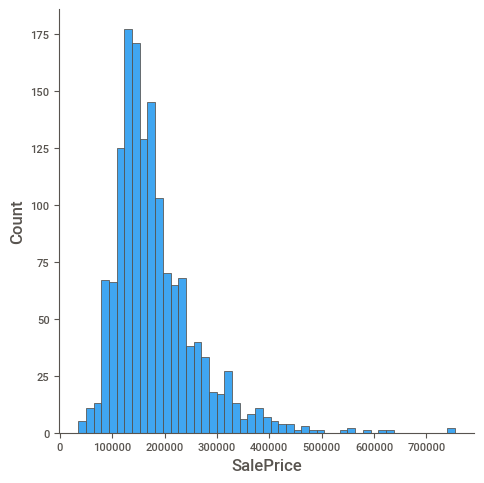

In [355]:
# Target/dependent variable is SalesPrice
sns.displot(df['SalePrice'])

In [356]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='SalePrice'>

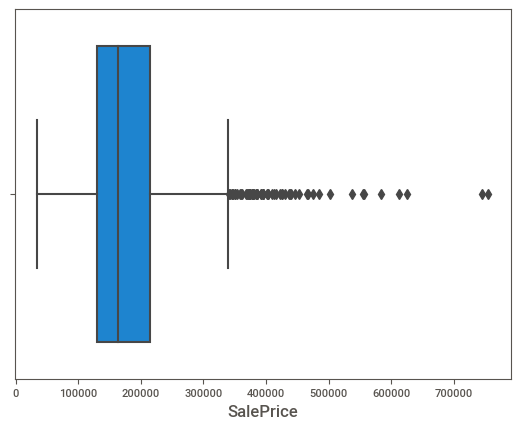

In [357]:
sns.boxplot(df['SalePrice'])

In [358]:
# Multi variate analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

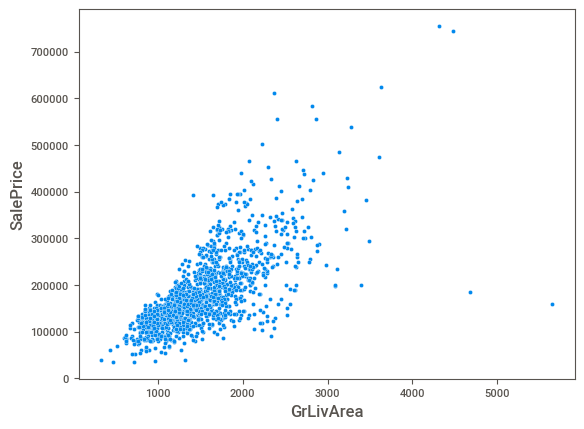

In [359]:
# SalePrice and GrLivArea
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

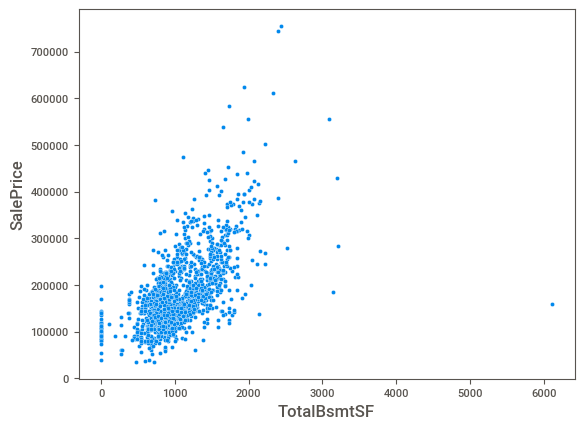

In [360]:
# SalePrice and TotalBsmtSF
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

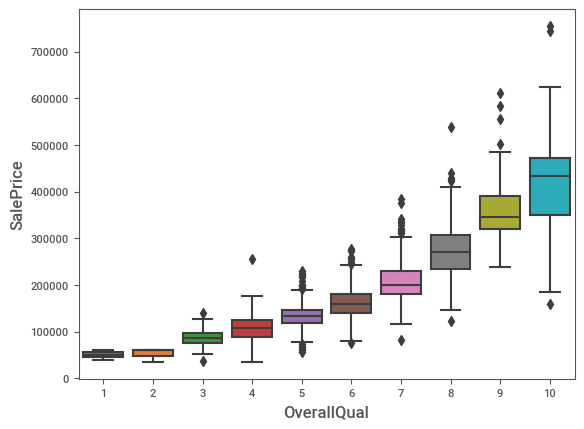

In [361]:
# SalePrice and OverallQual boxplot
sns.boxplot(x='OverallQual', y="SalePrice", data=df)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

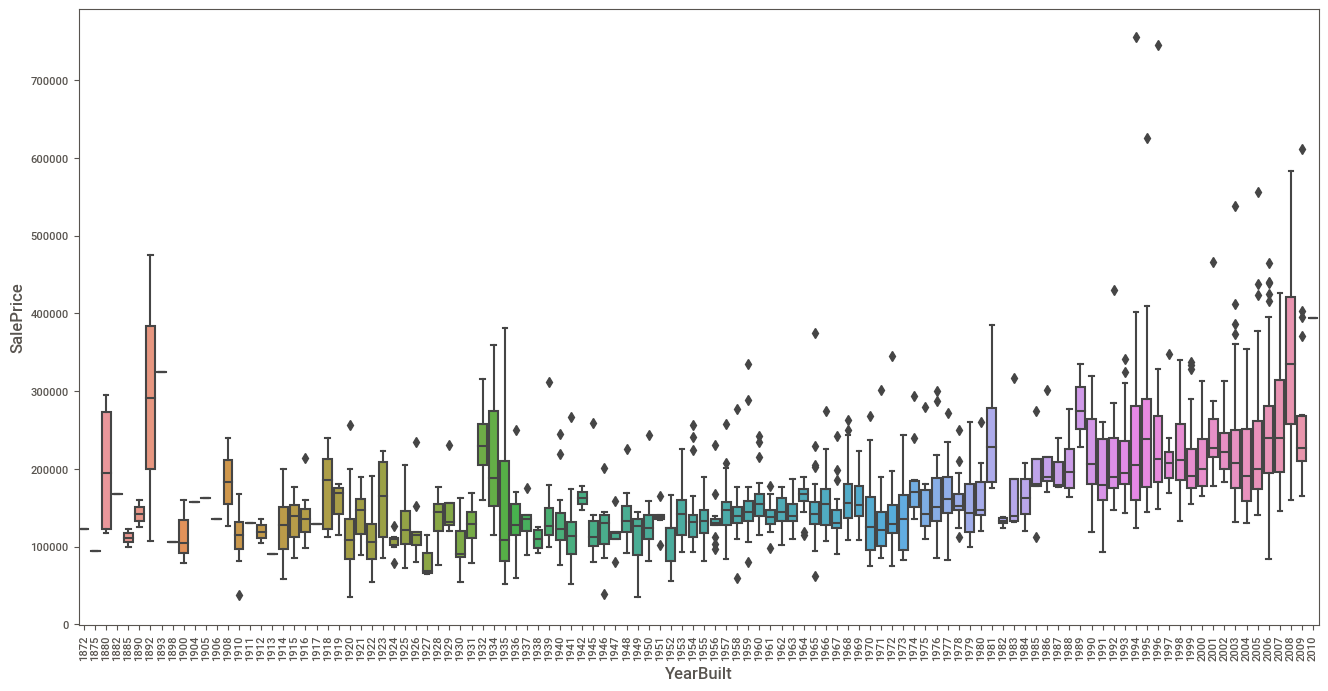

In [362]:
# SalePrice and YearBuilt boxplot
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y="SalePrice", data=df)
plt.xticks(rotation=90)

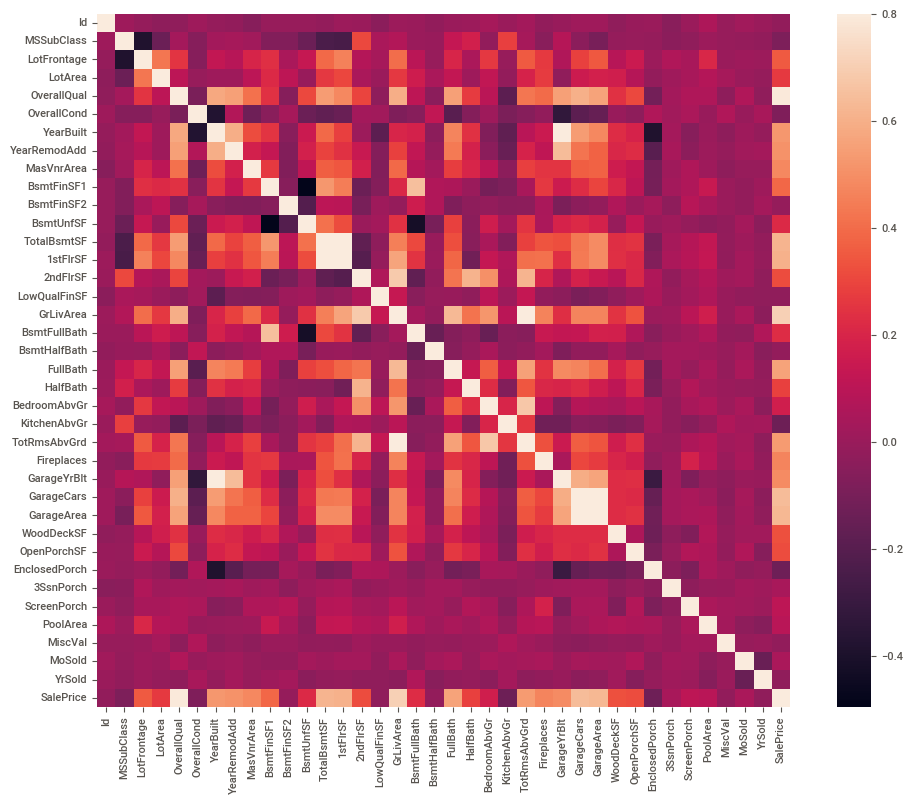

In [363]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

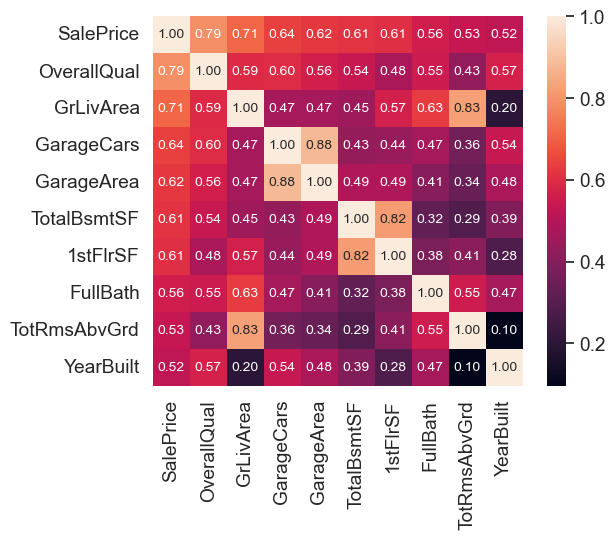

In [364]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

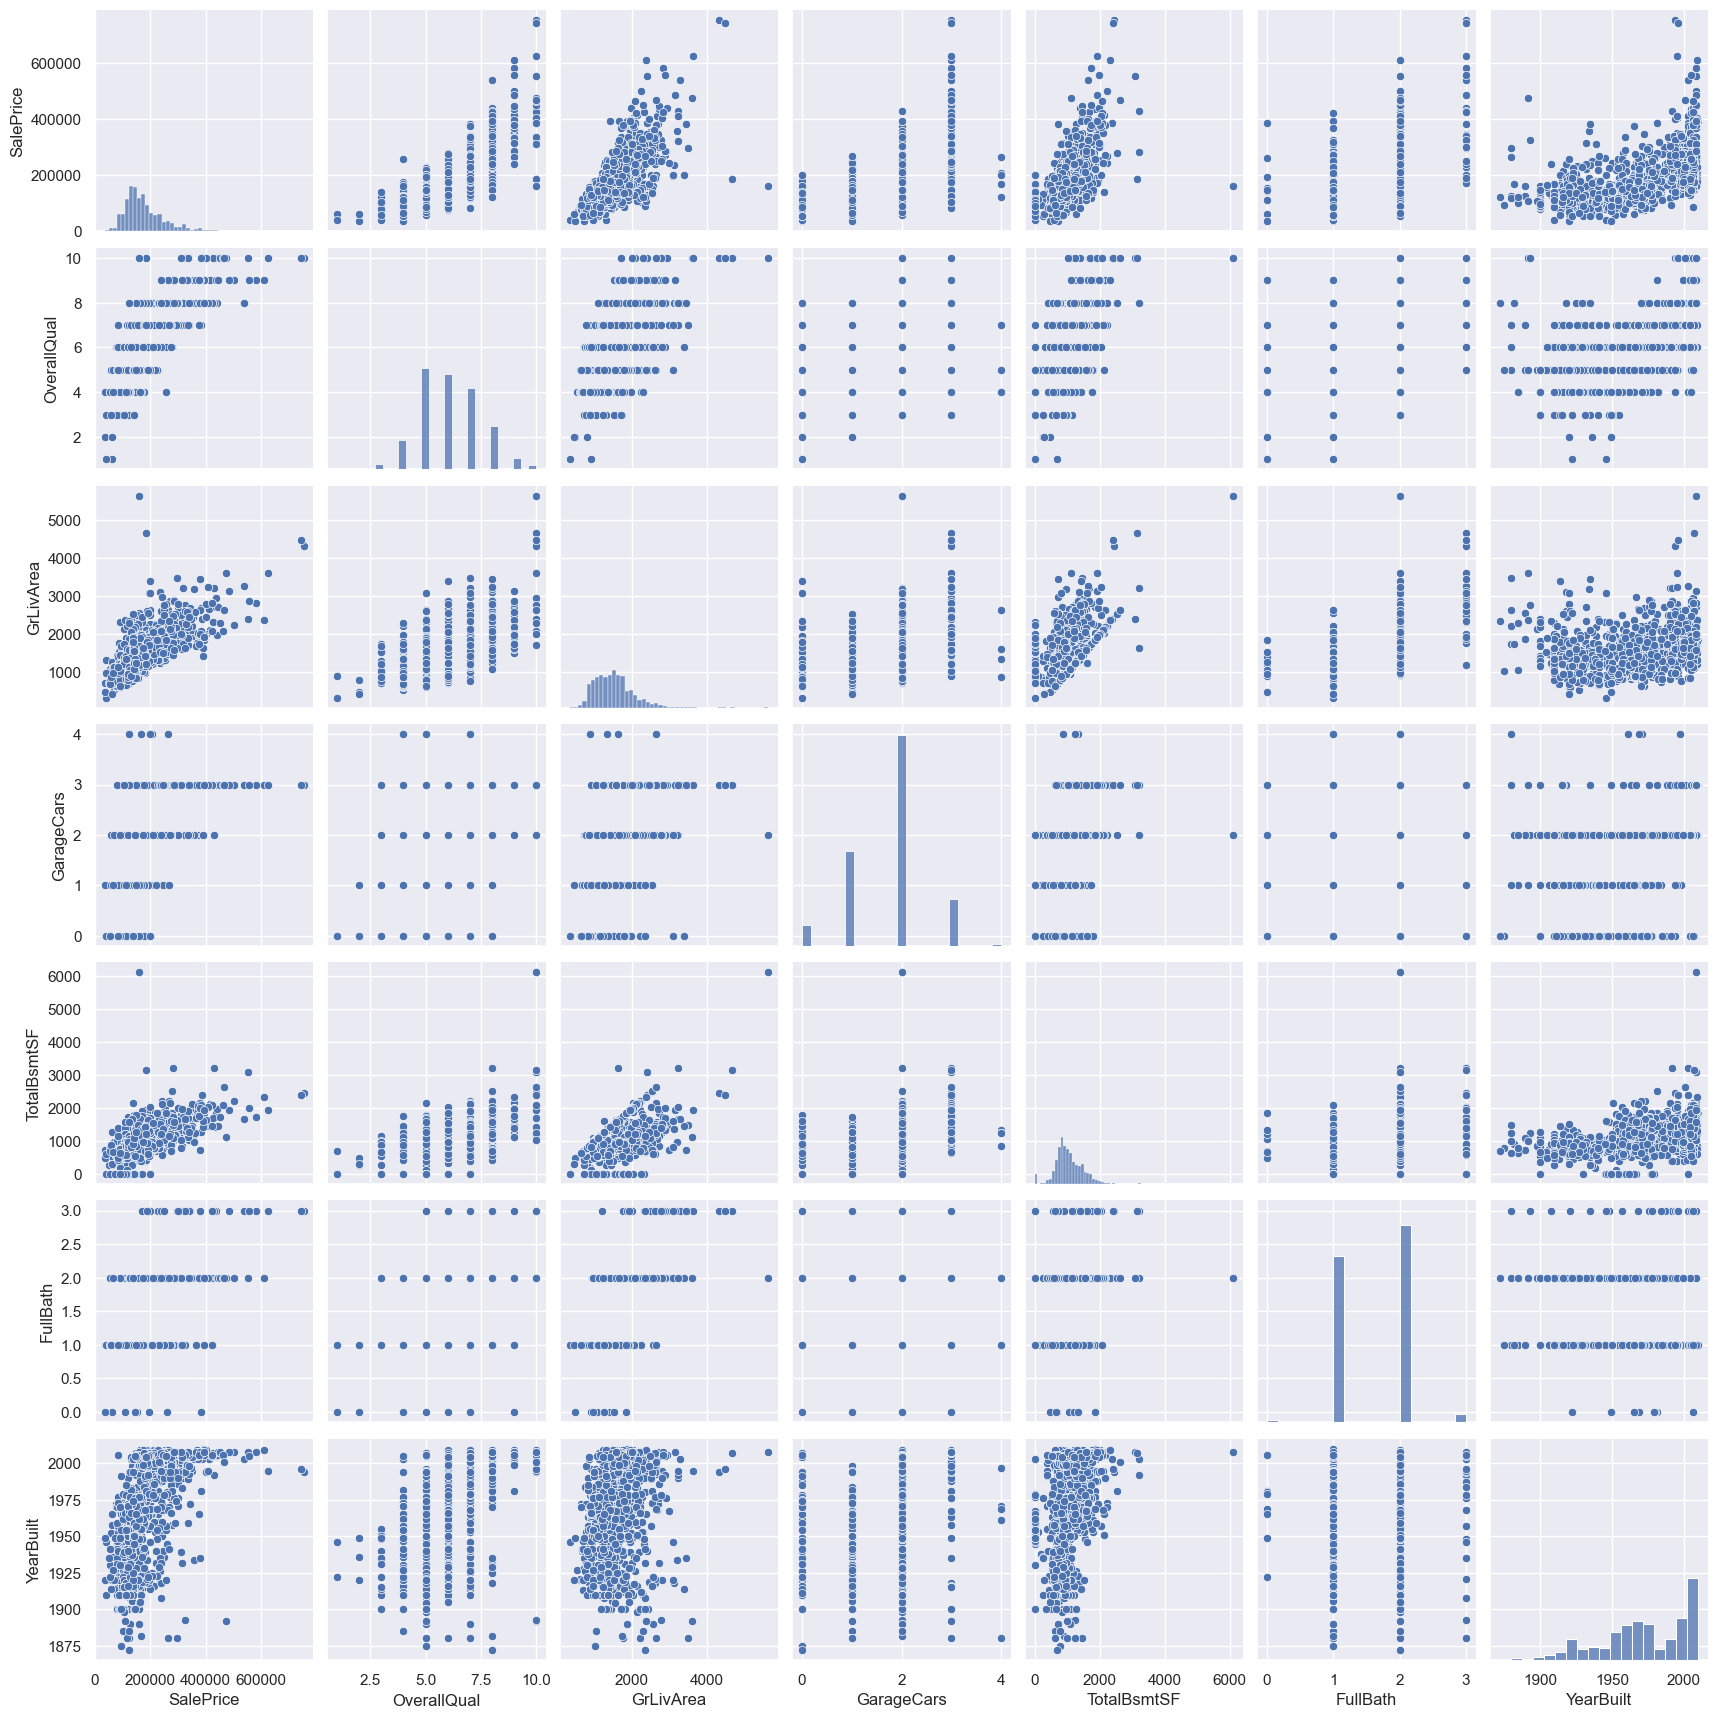

In [365]:
# Scatter plot for critical columns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();


### Missing Data Analysis

Anaysing the pattern in missing data and is the missing data really missing or its default value.

In [366]:
# Missing value count percentage.

total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### Observation from above table

There are 4 columns which have around 90% missing values, we need to verify from data dictionary if these are really missing or just misinterpretation of default values.

PoolQC has NA as 'No Pool'
MiscFeature has NA as 'None'
Alley has NA as 'No alley access'
Fence has NA as 'No Fence'

So these top 4 columns with highest missing value percentage actually have all values, their default values are being misinterpreted as missing values.

### Imputing Missing Values

From the observation above there can be other columns where default values might have been misinterpreted as missing even though these values have meaning as per data dictionary.

In [367]:
# Analysing the data disctionary to find these columns with 'NA' has valid meanin

all_cols_with_na_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [368]:
for i in all_cols_with_na_meaning:
    df[i].fillna("None", inplace=True)
    df[i].fillna("None", inplace=True)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [370]:
# Again calculating missing value percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000


#### Observation
There are still 5 columns with with missing values

In [371]:
missing_val_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical']

#### Imputing real missing values

These are the real missing values that are missing in data.

In [372]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

LotFrontage has high percentage of missing values so we can drop this column.

In [373]:
df.drop('LotFrontage', axis=1, inplace=True)

In [374]:
# Again calculating missing value percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


In [375]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [376]:
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [377]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Column 'MasVnrType' is a categorical column so we can fill missing values with 'None' and 'MasVnrArea' and 'GarageYrBlt' are numerical columns so we can fill missing values with median values.

In [378]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna("None", inplace=True)

In [379]:
# Again calculating missing value percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


Now there is only one row where one column has missing value, we can safely drop the column


In [380]:
df.dropna(inplace=True)

In [381]:
# Again calculating missing value percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


##### No missing values

In [382]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Since we have cleaned the data and filled all missing values, we can again do AutoEDA with 'Sweetviz'

In [383]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(df,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From Auto EDA also its clear that there are no missing values.

Determine the data types of all remaing features.

In [384]:
types_train = df.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [385]:
types_train

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object

In [386]:
# Convert num_train to a list
num_values_train = list(num_train.index)

In [387]:
print(num_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


There are all numerical columns in our dataset.

In [388]:
# Convert cat_train to list
cat_values_train = list(cat_train.index)

In [389]:
print(cat_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


These are all categorical columns in our dataset

In [390]:
print('num cols:' + str(len(num_values_train)) + ' cat cols:' + str(len(cat_values_train))) 

num cols:37 cat cols:43


There are total 37 numeric columns and 43 categorical columns.

### Data Preparation for model building

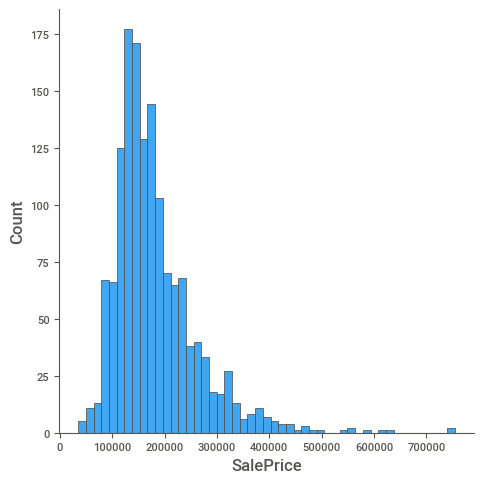

In [391]:
sns.displot(df['SalePrice'])

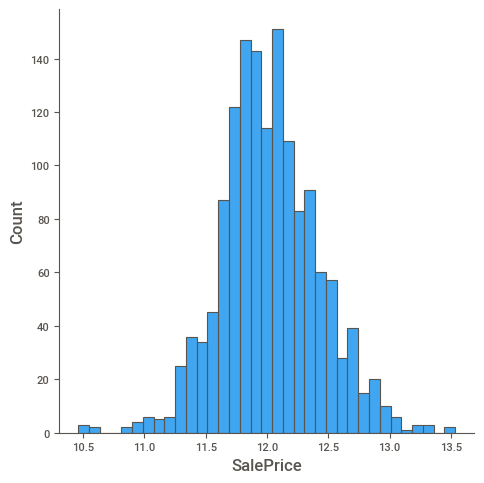

In [392]:
sns.displot(np.log(df['SalePrice']))

The log distribution of target column 'SalePrice' is normally disctributed as compared to its normal distribution and to ML models perform better with normally distrubuted columns.

So we will transform 'SalePrice' column to Log representation

In [393]:
df["TransformedPrice"] = np.log(df["SalePrice"])

### Data Preprocessing

We will get our data ready for model building, we will perform these 2 activities.

Feature scaling for numerical columns
Dummy variables for categorical columns

Test train split

In [394]:
# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=180)

In [395]:
num_values_train.append('TransformedPrice')

In [396]:
# Scaling the numeric columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [397]:
train[num_values_train] = scaler.fit_transform(train[num_values_train])

All Numeric columns in train set are scaled.

In [398]:
# Dummy variables for categorical columns

In [399]:
train_dummies = pd.get_dummies(train, columns=cat_values_train, drop_first=True)

Now the numerical columns are scaled and categorical columns are scaled, now we can create X and y.

In [400]:
X_train = train_dummies.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_train = train_dummies["TransformedPrice"].values

In [401]:
# Scaling and dummy of test dataset.
scaler_test = MinMaxScaler()
# Scaling numeric columns
test[num_values_train] = scaler_test.fit_transform(test[num_values_train])

# Dummies of categorical columns
test_dummies = pd.get_dummies(test, columns=cat_values_train, drop_first=True)

# X and y for test dataset
X_test = test_dummies.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_test = test_dummies["TransformedPrice"].values

In [402]:
train.shape

(1021, 81)

In [403]:
test.shape

(438, 81)

In [404]:
train_dummies.shape

(1021, 256)

In [405]:
test_dummies.shape

(438, 232)

There is one generic issue with dummy encoding i.e. test data might not have all the values of all categorical values and therefore this is a difference in the number of colums of test and train data.

We will fill the missing columns in test data.

In [406]:
# Get missing columns in the training test
missing_cols = set( train_dummies.columns ) - set( test_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummies[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_dummies = test_dummies[train_dummies.columns]

In [407]:
test_dummies.shape

(438, 256)

In [408]:
train_dummies.shape

(1021, 256)

In [409]:
# create new X and y

# X and y for train dataset
X_train = train_dummies.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_train = train_dummies["TransformedPrice"].values

# X and y for test dataset
X_test = test_dummies.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_test = test_dummies["TransformedPrice"].values



In [418]:
X_train

array([[0.17647059, 0.02590659, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.04327589, 0.77777778, ..., 0.        , 0.        ,
        1.        ],
       [0.17647059, 0.03749392, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05882353, 0.02267411, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04688728, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.58823529, 0.00797594, 0.66666667, ..., 0.        , 1.        ,
        0.        ]])

In [419]:
X_test

array([[0.        , 0.03711477, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.05627774, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.08434369, 0.875     , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23529412, 0.05757768, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04825618, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.94117647, 0.00121116, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

Now the number of columns are same.

### Model building

#### Unregularized model

In [410]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9443932750658999
Testing R2
-1.2688824892490305e+22


As observed there is a significant difference between R2 score of test and train data. This is a clear indication of model overfitting where our model performs better on train data but performs poorly on test data.

#### Regularizing the model to overcome model overfitting

In [411]:
train_dummies.shape

(1021, 256)

There are 253 columns after dummy variable creation and our model is becoming complex because of large number of features.

Lasso regularization would help us to reduce the number of features by making the coefficients of less significant features to zero.

In [412]:
# Setting alpha to 0.001 to see if we make any progress in model overfitting.

lr = Lasso(alpha=0.001)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8566740968756849
Testing R2
0.8348493632634161


We need to tune the value of alpha to bring train and test R2 score closer.

In [425]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2]}

In [414]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [426]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='r2', verbose=1)

In [427]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124056,0.011756,0.000399,0.000063,0.0,{'alpha': 1e-08},0.705470,0.427268,0.898414,0.848679,...,0.699732,0.168804,6,0.944907,0.956366,0.944761,0.948614,0.951561,0.949242,0.004368
1,0.132713,0.026780,0.000533,0.000289,0.0,{'alpha': 1e-07},0.742187,0.428031,0.898447,0.852198,...,0.707612,0.170211,5,0.944906,0.956363,0.944760,0.948612,0.951560,0.949240,0.004367
2,0.114207,0.008223,0.000367,0.000020,0.000001,{'alpha': 1e-06},0.798777,0.439336,0.898215,0.871428,...,0.724174,0.173785,4,0.944876,0.956324,0.944730,0.948563,0.951535,0.949205,0.004366
3,0.099325,0.007978,0.000383,0.000019,0.00001,{'alpha': 1e-05},0.810267,0.537974,0.900224,0.882083,...,0.753254,0.142554,3,0.943270,0.954892,0.942847,0.947012,0.950667,0.947738,0.004564
4,0.019169,0.006572,0.000320,0.000037,0.0001,{'alpha': 0.0001},0.897441,0.808262,0.874973,0.882733,...,0.833854,0.070937,1,0.917521,0.927031,0.919930,0.921669,0.938254,0.924881,0.007382


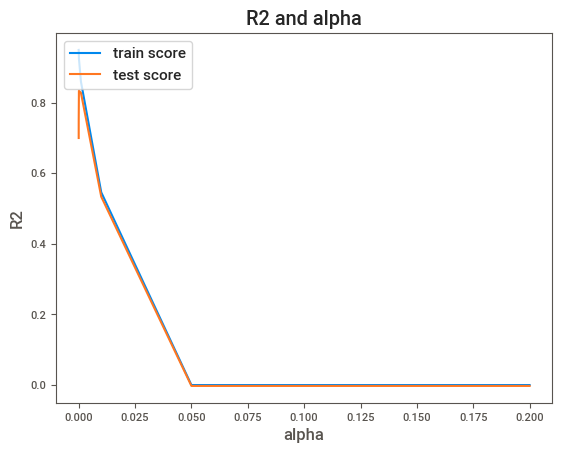

In [428]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Alpha value of '0.05' is getting the R2 score to 0.

In [441]:
lr = Lasso(alpha=0.003)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.7787751510407326
Testing R2
0.7723188530203325


In [437]:
lr.coef_

array([-0.01894954,  0.        ,  0.24873665,  0.03016333,  0.        ,
        0.03490417,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.13671577,
        0.03620922,  0.        ,  0.02181893,  0.01201724,  0.        ,
       -0.        ,  0.09260659,  0.        ,  0.        ,  0.09786159,
        0.01162298,  0.01057711,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.00922085, -0.01880791,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.00641055,
        0.        ,  0.        ,  0.        , -0.        ,  0.01103772,
       -0.        , -0.        , -0.00127167,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.01322153, -0.0130677 , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

Try with short range around the value 0.001


In [442]:
params = {'alpha': np.arange(0.00001, 0.01, 0.0001)}

In [461]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [462]:
model_cv.best_estimator_

Lasso(alpha=0.00041000000000000005)

In [466]:
model_cv.best_pa

{'alpha': 0.00041000000000000005}

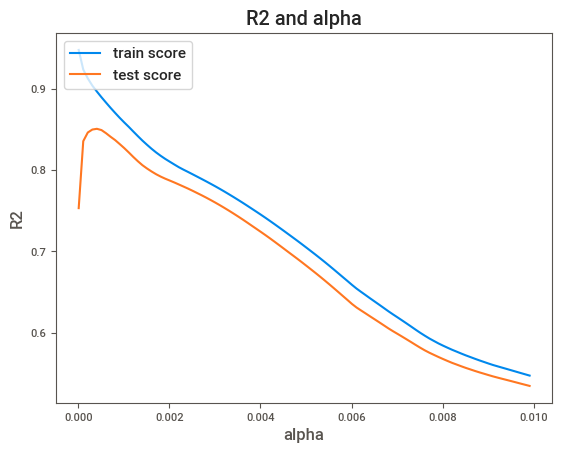

In [444]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimal value for Alpha seems to be between 0.00 to 0.001.

#### Ridge regularization

In [445]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00e-05, 1.10e-04, 2.10e-04, 3.10e-04, 4.10e-04, 5.10e-04,
       6.10e-04, 7.10e-04, 8.10e-04, 9.10e-04, 1.01e-03, 1.11e-03,
       1.21e-03, 1.31e-03, 1.41e-03, 1.51e-03, 1.61e-03, 1.71e-03,
       1.81e-03, 1.91e-03, 2.01e-03, 2.11e-03, 2.21e-03, 2.31e-03,
       2.41e-03, 2.51e-03, 2.61e-03, 2.71e-03, 2.81e-03, 2.91e-03,
       3.01e-03, 3.11e-03...
       6.61e-03, 6.71e-03, 6.81e-03, 6.91e-03, 7.01e-03, 7.11e-03,
       7.21e-03, 7.31e-03, 7.41e-03, 7.51e-03, 7.61e-03, 7.71e-03,
       7.81e-03, 7.91e-03, 8.01e-03, 8.11e-03, 8.21e-03, 8.31e-03,
       8.41e-03, 8.51e-03, 8.61e-03, 8.71e-03, 8.81e-03, 8.91e-03,
       9.01e-03, 9.11e-03, 9.21e-03, 9.31e-03, 9.41e-03, 9.51e-03,
       9.61e-03, 9.71e-03, 9.81e-03, 9.91e-03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [446]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006162,0.004916,0.000355,0.000145,0.00001,{'alpha': 1e-05},-0.036857,-0.048611,-0.032273,-0.038135,...,-0.038652,0.005385,100,-0.022333,-0.020289,-0.022260,-0.021326,-0.021560,-0.021554,0.000743
1,0.003403,0.000437,0.000384,0.000221,0.00011,{'alpha': 0.00011},-0.036853,-0.048566,-0.032269,-0.038085,...,-0.038636,0.005369,99,-0.022335,-0.020292,-0.022264,-0.021331,-0.021561,-0.021557,0.000743
2,0.002810,0.000233,0.000188,0.000017,0.00021,{'alpha': 0.00021},-0.036848,-0.048523,-0.032265,-0.038038,...,-0.038621,0.005355,98,-0.022338,-0.020295,-0.022268,-0.021336,-0.021561,-0.021560,0.000743
3,0.002917,0.000224,0.000215,0.000032,0.00031,{'alpha': 0.00031000000000000005},-0.036844,-0.048482,-0.032261,-0.037992,...,-0.038605,0.005341,97,-0.022341,-0.020298,-0.022272,-0.021341,-0.021561,-0.021563,0.000743
4,0.002938,0.000237,0.000358,0.000197,0.00041,{'alpha': 0.00041000000000000005},-0.036839,-0.048441,-0.032257,-0.037948,...,-0.038589,0.005328,96,-0.022343,-0.020301,-0.022276,-0.021346,-0.021562,-0.021566,0.000743


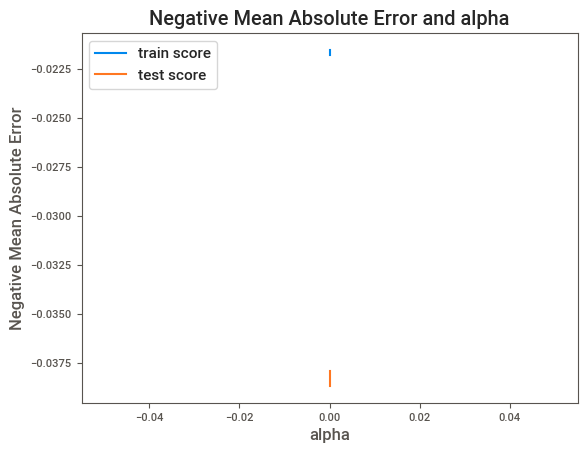

In [447]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [448]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.17682193e-02,  2.35754494e-02,  8.91907379e-02,  5.06850599e-02,
        1.36665936e-02,  3.05218840e-02,  1.10891824e-02,  1.35364094e-02,
        1.16752149e-02,  2.28751995e-02,  2.34032615e-02,  4.96747039e-02,
        4.10964277e-02,  1.29719127e-02,  5.62576487e-02,  3.81948685e-02,
       -7.92558887e-04,  4.48581925e-02,  2.57958049e-02,  3.00896823e-02,
        1.32951770e-03,  6.32079046e-02,  2.51779254e-02, -8.84736498e-03,
        4.63868763e-02,  3.50903672e-02,  2.89291410e-02,  8.83702006e-03,
        1.35066398e-02,  5.89710772e-03,  2.85045911e-02,  1.68717118e-04,
       -1.22995917e-03,  3.92559164e-03, -8.94313937e-03,  1.89293613e-02,
        1.00278193e-02,  2.17810488e-02,  1.28616023e-03,  1.33079907e-02,
       -2.56156445e-03,  1.07991226e-02,  7.39240496e-03, -1.33726127e-02,
       -1.65734218e-03,  1.62654358e-02,  8.50521867e-03,  1.35706101e-02,
       -5.22342717e-03,  1.70684053e-02, -1.35075285e-02, -4.27838912e-03,
       -5.21020330e-03, -

### Subjective Questions

In [474]:
# Optimal value for alpha came out to be 0.004, what happens with double value

lr = Lasso(alpha=0.004)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8058042391472269
Testing R2
0.8152091403942028


In [ ]:
lr.b

In [457]:
lr.coef_

array([-0.00000000e+00,  0.00000000e+00,  2.45500176e-01,  0.00000000e+00,
        0.00000000e+00,  4.38236203e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.01032932e-03,  0.00000000e+00,
       -0.00000000e+00,  1.20509263e-01,  0.00000000e+00,  0.00000000e+00,
        1.08759772e-01,  1.01774479e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.51074454e-02, -1.35150752e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -9.03493229e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [465]:
lr = Lasso(alpha=0.0008)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8670772664783504
Testing R2
0.836063024168417


In [476]:
lr.__getattribute__

<method-wrapper '__getattribute__' of Lasso object at 0x7fc865dbea30>

In [481]:
betas = pd.DataFrame(index=train_dummies.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).columns)

In [482]:
betas['coeff'] = lr.coef_

In [483]:
betas

,coeff
MSSubClass,-0.000000
LotArea,0.000000
OverallQual,0.245500
OverallCond,0.000000
YearBuilt,0.000000
...,...
SaleCondition_AdjLand,-0.000000
SaleCondition_Alloca,-0.000000
SaleCondition_Family,-0.000000
SaleCondition_Normal,0.000000


In [484]:
betas['coeff'].sort_values(ascending=False)[:10]

OverallQual          0.245500
TotRmsAbvGrd         0.120509
GarageCars           0.108760
YearRemodAdd         0.043824
CentralAir_Y         0.030067
MSZoning_RL          0.015107
GarageType_Attchd    0.014463
Foundation_PConc     0.013161
BsmtExposure_Gd      0.012639
BsmtFinType1_GLQ     0.010263
Name: coeff, dtype: float64

In [487]:
top5 = ['OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'YearRemodAdd', 'CentralAir_Y']

In [490]:
## drop them from train and test data
# X and y for train dataset
X_train_dropped = train_dummies.drop(["Id", "SalePrice", "TransformedPrice"]+ top5, axis=1).values
y_train_dropped = train_dummies["TransformedPrice"].values

# X and y for test dataset
X_test_dropped = test_dummies.drop(["Id", "SalePrice", "TransformedPrice"]+ top5, axis=1).values
y_test_dropped = test_dummies["TransformedPrice"].values

In [491]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_dropped, y_train_dropped) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00e-05, 1.10e-04, 2.10e-04, 3.10e-04, 4.10e-04, 5.10e-04,
       6.10e-04, 7.10e-04, 8.10e-04, 9.10e-04, 1.01e-03, 1.11e-03,
       1.21e-03, 1.31e-03, 1.41e-03, 1.51e-03, 1.61e-03, 1.71e-03,
       1.81e-03, 1.91e-03, 2.01e-03, 2.11e-03, 2.21e-03, 2.31e-03,
       2.41e-03, 2.51e-03, 2.61e-03, 2.71e-03, 2.81e-03, 2.91e-03,
       3.01e-03, 3.11e-03...
       6.61e-03, 6.71e-03, 6.81e-03, 6.91e-03, 7.01e-03, 7.11e-03,
       7.21e-03, 7.31e-03, 7.41e-03, 7.51e-03, 7.61e-03, 7.71e-03,
       7.81e-03, 7.91e-03, 8.01e-03, 8.11e-03, 8.21e-03, 8.31e-03,
       8.41e-03, 8.51e-03, 8.61e-03, 8.71e-03, 8.81e-03, 8.91e-03,
       9.01e-03, 9.11e-03, 9.21e-03, 9.31e-03, 9.41e-03, 9.51e-03,
       9.61e-03, 9.71e-03, 9.81e-03, 9.91e-03])},
             return_train_score=True, scoring='r2', verbose=1)

In [492]:
model_cv.best_estimator_

Lasso(alpha=0.00031000000000000005)

In [493]:
betas_dropped = pd.DataFrame(index=train_dummies.drop(["Id", "SalePrice", "TransformedPrice"] + top5, axis=1).columns)

In [494]:
betas_dropped['coeff'] = lr.coef_

ValueError: Length of values (253) does not match length of index (248)